In [82]:
import pandas as pd

dfX = pd.read_csv('.\\datos\\train_values.csv')
dfY = pd.read_csv('.\\datos\\train_labels.csv')


In [83]:
dfX.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_agriculture  \
0                      t               r  ...                             0   
1                      o               r  ...                             0   
2                      t               r  ...                             0   
3                      t               r  ...                             0   
4                      t               r  ...                             0   

  has_secondary_use_hotel has_secondary_use_rental  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   has_secondary_use_other  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 39 columns]

sloper: 0.0002434524092510087 intercept: 2.231812284680975
R cuadrado: 0.0008569262199615574


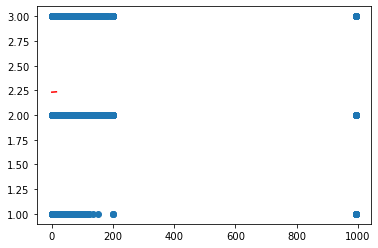

In [84]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

datosX = dfX['age']
datosY = dfY['damage_grade']

slope, intercept, r_value, p_value, std_err = stats.linregress(datosX, datosY)

print("sloper: "+str(slope),"intercept: "+str(intercept))

c=r_value**2

x = np.linspace(0,15)
y = slope * x + intercept

plt.scatter(datosX,datosY)
plt.plot(x, y, c='r')
print("R cuadrado: "+str(c))

In [85]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = dfX[['count_floors_pre_eq', 'age', 'area_percentage','height_percentage']][0:208481]
Y = dfY['damage_grade'][0:208481]
X = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           damage_grade   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2026.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:12:18   Log-Likelihood:            -1.8937e+05
No. Observations:              208481   AIC:                         3.788e+05
Df Residuals:                  208476   BIC:                         3.788e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.1662      0.005    468.809      0.000       2.157       2.175
count_floors_pre_eq     0.1639      0.003     57.162      0.000       0.158       0.170
age                     0.0001   1.81e-05      7.492      0.000       0.000       0.000
area_percentage        -0.0183      0.000    -59.705      0.000      -0.019      -0.018
height_percentage      -0.0246      0.001    -22.323      0.000      -0.027      -0.022
==============================================================================
Omnibus:                     7264.040   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3624.942
Skew:                          -0.119   Prob(JB):                         0.00
Kurtosis:                       2.399   Cond. No.                         283.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
y_real=dfY['damage_grade'][208481:]

x_real=dfX[['count_floors_pre_eq', 'age', 'area_percentage','height_percentage']][208481:]

y_est=2.1663+0.1625*x_real['count_floors_pre_eq']+0.0001*x_real['age']+(-0.0181)*x_real['area_percentage']+(-0.0245)*x_real['height_percentage']

In [87]:
y_media=np.mean(y_real)

r_cuadrado=np.sum((y_est-y_media)**2)/np.sum((y_real-y_media)**2)

print(r_cuadrado)

0.03653058900296814
